In [ ]:
# Install package for UCI repo
!pip install ucimlrepo

In [ ]:
import ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

In [ ]:
# 1. Fetch a dataset (e.g., Breast Cancer Wisconsin (diagnostic) dataset)
breast_cancer_dataset = ucimlrepo.fetch_ucirepo(id=17)
X = pd.DataFrame(breast_cancer_dataset.data.features, columns=breast_cancer_dataset.feature_names)
y = pd.DataFrame(breast_cancer_dataset.data.targets, columns=breast_cancer_dataset.target_names)
data = pd.concat([X, y], axis=1)

In [ ]:
print(data.columns.to_list())

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']


In [ ]:
# 2. Function to demonstrate PDF and CDF for a feature and perform anomaly detection
def demonstrate_pdf_cdf_and_anomaly_detection(data, feature_name, threshold=2.5):
    """
    Demonstrates PDF and CDF for a specified feature from the dataset,
    and performs anomaly detection using the CDF.

    Args:
        data: Pandas DataFrame containing the dataset.
        feature_name: Name of the feature to analyze.
        threshold:  Data points with a CDF value below this threshold or above (1-threshold)
                    are considered anomalies.
    """

    if feature_name not in data.columns:
        raise ValueError(f"Feature '{feature_name}' not found in the DataFrame.")

    if not pd.api.types.is_numeric_dtype(data[feature_name]):
        raise TypeError(f"Feature '{feature_name}' must be numeric.")

    feature_data = data[feature_name]

    # Fit a normal distribution to the feature
    mean = feature_data.mean()
    std = feature_data.std()
    normal_dist = norm(mean, std)

    # Generate x-values for plotting
    x = np.linspace(feature_data.min() - 3 * std, feature_data.max() + 3 * std, 1000)

    # Calculate PDF and CDF
    pdf_values = normal_dist.pdf(x)
    cdf_values = normal_dist.cdf(x)

    # Plot PDF
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf_values, 'b-', label='PDF')
    plt.hist(feature_data, bins=30, density=True, alpha=0.6, color='gray', label='Data Histogram')
    plt.title(f'PDF of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Probability Density')
    plt.legend()

    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(x, cdf_values, 'g-', label='CDF')
    plt.title(f'CDF of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Anomaly Detection using CDF
    anomalies_lower = feature_data[normal_dist.cdf(feature_data) < threshold]
    anomalies_upper = feature_data[normal_dist.cdf(feature_data) > (1 - threshold)]
    anomalies = pd.concat([anomalies_lower, anomalies_upper])

    print(f"Anomaly Detection for '{feature_name}':")
    print(f"Number of anomalies: {len(anomalies)}")
    print("Anomalous values:")
    print(anomalies)

    return anomalies

# PDF and CDF
The code generates two graphs for a selected feature: the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF). Here's how to interpret them:

1. Probability Density Function (PDF)
  1. The PDF shows the likelihood of the feature taking on a particular value.
  1. The x-axis represents the values of the feature.
  1. The y-axis represents the probability density. It's not a direct probability, but rather a measure of the relative likelihood.
  1. The shape of the curve indicates the distribution of the data. For example, a bell-shaped curve suggests a normal distribution.
  1. The histogram overlaid on the PDF provides a visual comparison of the distribution of the actual data to the fitted PDF.
    1. If the histogram bars are close to the PDF curve, it means the normal distribution is a good fit for the data.
    1. If the histogram bars deviate significantly from the PDF curve, it suggests the data may not be normally distributed.

2. Cumulative Distribution Function (CDF)
  1. The CDF shows the probability that the feature is less than or equal to a given value.
  1. The x-axis represents the values of the feature.
  1. The y-axis represents the cumulative probability, ranging from 0 to 1.
  1. The CDF starts at 0 on the left and increases to 1 on the right.
  1. The slope of the CDF indicates how quickly the cumulative probability increases. A steep slope means the probability accumulates rapidly, indicating a high concentration of data points in that range. An S-curve shape is typical for a normal distribution.

> Example Interpretation
Let's say we analyzed the 'radius_mean' feature from the Breast Cancer dataset.

1. PDF: If the PDF plot shows a bell-shaped curve centered around 15, it means that most tumors have a mean radius close to 15mm, and the probability density is highest around that value.
1. CDF: If the CDF plot shows that the curve reaches 0.5 at 'radius_mean' = 15, it means that there is a 50% chance that a tumor has a mean radius of 15mm or less. If the CDF reaches 1 at around 25mm, it implies that nearly all tumors have a mean radius of 25mm or less.

> Using the Graphs for Anomaly Detection
The code uses the CDF for anomaly detection. By setting a threshold (e.g., 0.025), the code identifies data points with CDF values below 0.025 or above 0.975 (1-0.025) as anomalies. These points lie in the tails of the distribution, indicating that they are unusual values for that feature.

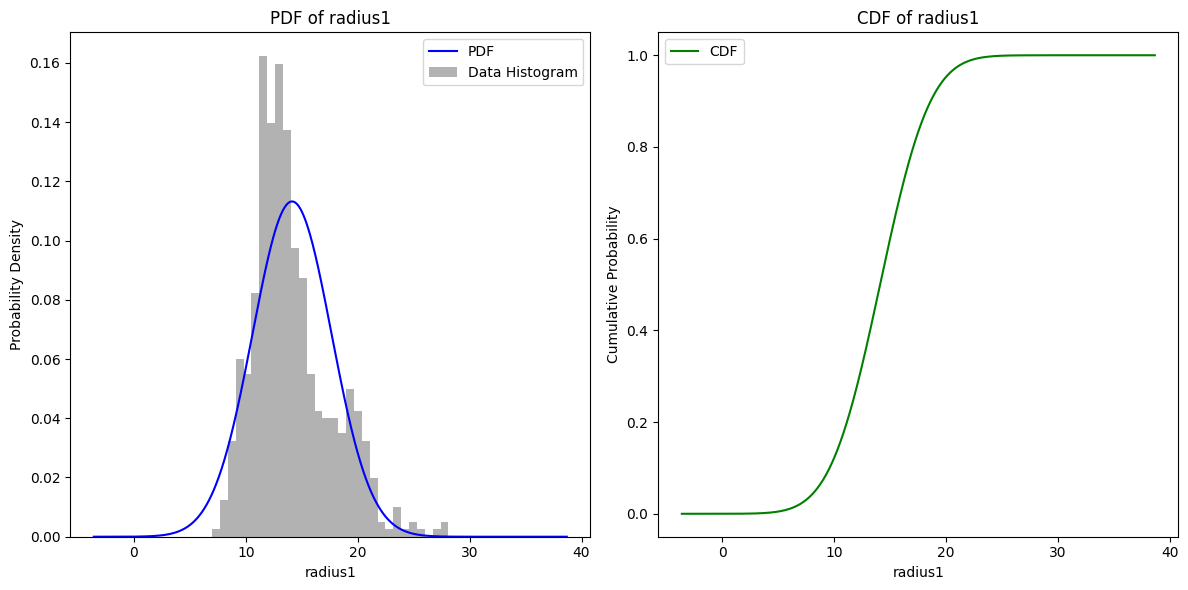

Anomaly Detection for 'radius1':
Number of anomalies: 23
Anomalous values:
101     6.981
23     21.160
82     25.220
108    22.270
122    24.250
164    23.270
180    27.220
181    21.090
202    23.290
212    28.110
236    23.210
272    21.750
339    23.510
352    25.730
368    21.710
369    22.010
372    21.370
393    21.610
449    21.100
461    27.420
503    23.090
521    24.630
564    21.560
Name: radius1, dtype: float64


In [ ]:
# 3. Select a feature and demonstrate PDF and CDF, and perform anomaly detection
feature_to_analyze = 'radius1'  # You can change this to any other numerical feature
anomalous_values = demonstrate_pdf_cdf_and_anomaly_detection(data, feature_to_analyze, threshold=0.025) #Adjust threshold as needed.